# Exercise

print GDPs of several countries

In [321]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob

%matplotlib inline

## Flags

In [3]:
do_download = True

## Download real data set
source: http://databank.worldbank.org/data/download/WDI_csv.zip

In [7]:
if do_download:
    import urllib2
    import zipfile
    
    zip_name = 'WDI_csv.zip'
    url = 'http://databank.worldbank.org/data/download/WDI_csv.zip'
    
    page = urllib2.urlopen(url)
    data = page.read()
    
    with open(zip_name, 'wb') as z:
        z.write(data)
        
    # unzip
    zip_ref = zipfile.ZipFile(zip_name, 'r')
    zip_ref.extractall('.')
    zip_ref.close()

In [11]:
csvs = glob('*.csv')
csvs

['WDI_Country.csv',
 'WDI_CS_Notes.csv',
 'WDI_Data.csv',
 'WDI_Description.csv',
 'WDI_Footnotes.csv',
 'WDI_Series.csv',
 'WDI_ST_Notes.csv']

In [35]:
wdi = pd.read_csv(csvs[2])
wdi.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,AFG,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,41.000000,NaN,43.0,NaN,NaN,NaN
3,Afghanistan,AFG,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,29.000000,NaN,32.0,NaN,NaN,NaN
4,Afghanistan,AFG,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,80.637334,NaN,83.0,NaN,NaN,NaN


In [47]:
wdi_can_gdp.columns

Index([u'Country Name', u'Country Code', u'Indicator Name', u'Indicator Code',
       u'1960', u'1961', u'1962', u'1963', u'1964', u'1965', u'1966', u'1967',
       u'1968', u'1969', u'1970', u'1971', u'1972', u'1973', u'1974', u'1975',
       u'1976', u'1977', u'1978', u'1979', u'1980', u'1981', u'1982', u'1983',
       u'1984', u'1985', u'1986', u'1987', u'1988', u'1989', u'1990', u'1991',
       u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999',
       u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007',
       u'2008', u'2009', u'2010', u'2011', u'2012', u'2013', u'2014', u'2015'],
      dtype='object')

In [333]:
countries = wdi.loc[:, 'Country Name'].unique()
ctr_starting_with_g = filter(lambda x : x.startswith('G'), countries)
ctr_starting_with_g

['Gabon',
 'Gambia, The',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana']

In [353]:
indicators = wdi.loc[:, 'Indicator Code'].unique()
np.size(indicators)

1420

In [376]:
wdi_gs = wdi.loc[wdi.loc[:, 'Country Name'].map(lambda x: x in ctr_starting_with_g), :]
wdi_gs.shape

wdi_can = wdi.loc[wdi.loc[:, 'Country Name'] == 'Canada', :]
wdi_can.shape

(1420, 60)

In [377]:
match_word = 'GDP'
selector_fcn = lambda x: x.upper().find(match_word) >= 0

In [381]:
gdp_match = wdi_can.loc[:, 'Indicator Code'].map(selector_fcn)
wdi_can_gdp = wdi_can.loc[gdp_match, :]
wdi_can_gdp.shape

(32, 60)

In [382]:
wdi_gs_gdp.loc[:, ['Indicator Name', 'Indicator Code']]

,Indicator Name,Indicator Code
110760,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05
110830,"Agriculture, value added (% of GDP)",NV.AGR.TOTL.ZS
110902,Broad money (% of GDP),FM.LBL.BMNY.GD.ZS
110909,Cash surplus/deficit (% of GDP),GC.BAL.CASH.GD.ZS
110914,"Central government debt, total (% of GDP)",GC.DOD.TOTL.GD.ZS
110957,"Claims on central government, etc. (% GDP)",FS.AST.CGOV.GD.ZS
110958,Claims on other sectors of the domestic econom...,FS.AST.DOMO.GD.ZS
110961,CO2 emissions (kg per 2005 US$ of GDP),EN.ATM.CO2E.KD.GD
110962,CO2 emissions (kg per 2011 PPP $ of GDP),EN.ATM.CO2E.PP.GD.KD
110963,CO2 emissions (kg per PPP $ of GDP),EN.ATM.CO2E.PP.GD


In [400]:
wdi_can_gdp = wdi_can_gdp.loc[[50164, 50168, 50172, 50173]]

#highlighting
#wdi_can_gdp.style.format({'Indicator Name' : 'background-color: yellow'})
wdi_can_gdp.style.apply?

In [54]:
# 'transpose' data

idx = wdi_can_gdp.loc[:, '1960':].columns
cols = wdi_can_gdp.loc[:, 'Indicator Name']
data = wdi_can_gdp.loc[:, '1960':].as_matrix()
tr_wdi_can_gdp = pd.DataFrame(data.transpose(), index=idx, columns=cols)
tr_wdi_can_gdp

Indicator Name,GDP (current LCU),GDP growth (annual %),GDP per capita (current US$),GDP per capita growth (annual %)
1960,3.985173e+10,NaN,2294.568814,NaN
1961,4.130068e+10,3.163292,2231.293824,1.119387
1962,4.486561e+10,7.116779,2255.230044,5.142939
1963,4.816312e+10,5.181776,2354.839122,3.240539
1964,5.272553e+10,6.699457,2529.518179,4.706261
1965,5.811360e+10,6.636545,2739.585849,4.723612
1966,6.502538e+10,6.584965,3010.705908,4.617865
1967,6.986666e+10,2.915310,3173.076194,1.080058
1968,7.624108e+10,5.295342,3411.060154,3.610129
1969,8.386732e+10,5.260001,3703.990405,3.838380


## save as csv

In [55]:
tr_wdi_can_gdp.to_csv('WDI_Canada_GDP.csv')

## plotting

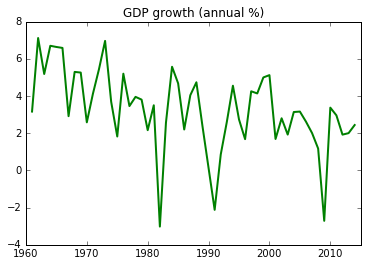

In [270]:
growth_data = tr_wdi_can_gdp.ix[:, 1]
growth_data.plot(color='Green', lw=2, title=tr_wdi_can_gdp.columns[1])

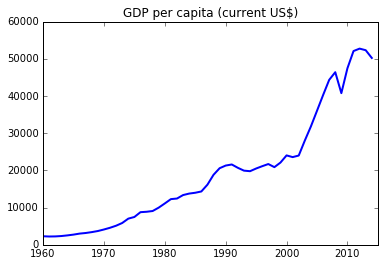

In [271]:
capita_data = tr_wdi_can_gdp.ix[:, 2]
capita_data.plot(color='Blue', lw=2, title=tr_wdi_can_gdp.columns[2])

# Final example

Compare per capita growth of list of countries (e.g. BRIC) in a certain time period (e.g. 2000- 2010)

In [289]:
country_list = ['Germany', 'Canada']
start_year = '1970'
end_year = '2010'
gdp_code = 'NY.GDP.PCAP.KD.ZG'

selection_fct = lambda s: s in country_list
criterion = wdi.loc[:, 'Country Name'].map(selection_fct)

wdi_bric = wdi.loc[criterion & (wdi.loc[:, 'Indicator Code'] == gdp_code), :]
wdi_bric.shape

(2, 60)

In [290]:
# reformat the data to have the relevant data series along the columns of the table
df_temp = wdi_bric.loc[:, start_year:end_year]
idx = df_temp.columns
cols = wdi_bric.loc[:, 'Country Name']
data = df_temp.as_matrix()
gdp_data = pd.DataFrame(data.transpose(), columns=cols, index=idx)

(-6.0, 6.0)

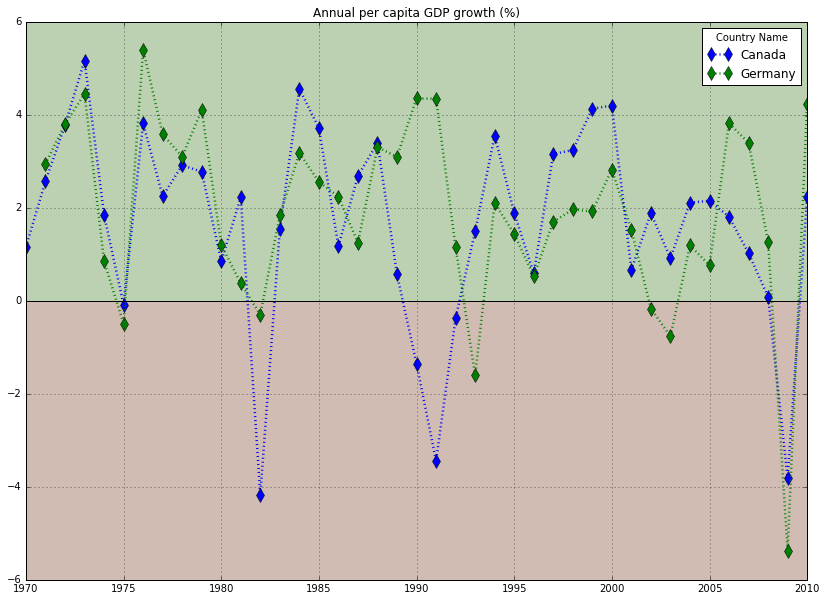

In [291]:
gdp_data.plot(lw=2.5, 
              title='Annual per capita GDP growth (%)', 
              marker='d',
              style=':',
              markersize=10, 
              figsize=(14,10), 
              grid=True)
plt.axhline(color='black')
axes = plt.gca()
y_limits = axes.get_ylim()
plt.axhspan(0, y_limits[1], facecolor='#226600', alpha=0.3)
plt.axhspan(0, y_limits[0], facecolor='#662200', alpha=0.3)
axes.set_ylim(y_limits)


# Experimental section

## Interpolation 
using scipy.interpolate.UnivartiateSpline and scipy.interpolate.interp1d

In [308]:
from scipy import interpolate

sample_spacing =  0.2
idx = 0

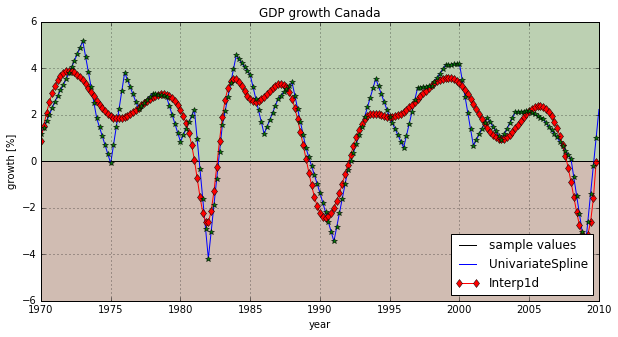

In [320]:
#interpolate data
years = gdp_data.index.astype(np.float32)
gdp_growth = gdp_data.loc[:, country_list[idx]].astype(np.float32)
gdp_growth = gdp_growth.fillna(method='bfill')

x_new = np.arange(int(years[0]), int(years[-1]), sample_spacing)

f = interpolate.UnivariateSpline(years, gdp_growth)
g = interpolate.interp1d(years, gdp_growth)


#plot
fig = plt.figure(figsize=(10,5))
plt.axhline(0, color='black')
plt.plot(years, gdp_growth, '-', x_new, f(x_new), 'rd-', x_new, g(x_new), 'g*')
plt.legend(['sample values', 'UnivariateSpline', 'Interp1d'], loc='lower right')
plt.title('GDP growth {}'.format(country_list[idx]))
plt.xlabel('year')
plt.ylabel('growth [%]')
plt.grid()

axes = plt.gca()
y_limits = axes.get_ylim()
plt.axhspan(0, y_limits[1], facecolor='#226600', alpha=0.3)
plt.axhspan(0, y_limits[0], facecolor='#662200', alpha=0.3)
axes.set_ylim(y_limits)

idx += 1
idx = np.minimum(idx, np.size(country_list)-1)

In [404]:
import urllib2
import os

nb_url = 'https://raw.githubusercontent.com/pydata/pandas/master/doc/source/html-styling.ipynb'

page = urllib2.urlopen(nb_url)
data = page.read()

with open(os.path.basename(nb_url), 'wb') as z:
    z.write(data)
        